In [205]:
# import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [74]:
# import the literacy/fertility data
filepath = 'https://assets.datacamp.com/production/course_1550/datasets/female_literacy_fertility.csv'

In [48]:
fertility_df = pd.read_csv(filepath)

In [49]:
fertility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
Country            162 non-null object
Continent          162 non-null object
female literacy    162 non-null float64
fertility          162 non-null float64
population         162 non-null object
dtypes: float64(2), object(3)
memory usage: 6.4+ KB


In [50]:
fertility_df.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


In [51]:
fertility_df.columns

Index(['Country ', 'Continent', 'female literacy', 'fertility', 'population'], dtype='object')

In [52]:
# rename column
fertility_df = fertility_df.rename(index=str, columns = {'female literacy':'female_literacy'})

In [53]:
fertility_df.head()

,Country,Continent,female_literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


#### EDA of literacy/fertility data

In [69]:
fertility = fertility_df.fertility.values
fertility.shape

(162,)

In [70]:
illiteracy = 100-fertility_df.female_literacy
illiteracy.shape

(162,)

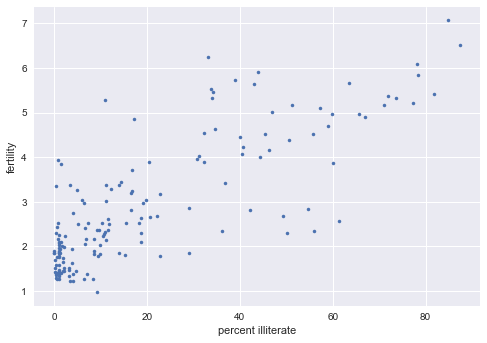

In [83]:
# plot the illiteracy vs fertility
plt.style.use('seaborn')
plt.margins(0.05)
plt.plot(illiteracy,fertility,marker='.',linestyle='none')
plt.xlabel('percent illiterate')
plt.ylabel('fertility')
plt.show()

#### define a function for pearson coefficient

In [85]:
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [93]:
pearson_r(illiteracy,illiteracy)

0.80413240268153441

#### perform a linear regression using numpy least squares fit

In [126]:
a, b = np.polyfit(illiteracy, fertility,deg=1)

In [127]:
print(f"intercept:{b}" )
print(f"slope:{a}" )

intercept:1.888050610636557
slope:0.04979854809063423


#### plot the regression line

In [128]:
x = np.array([0,100])
y = a * x + b

In [129]:
y

array([ 1.88805061,  6.86790542])

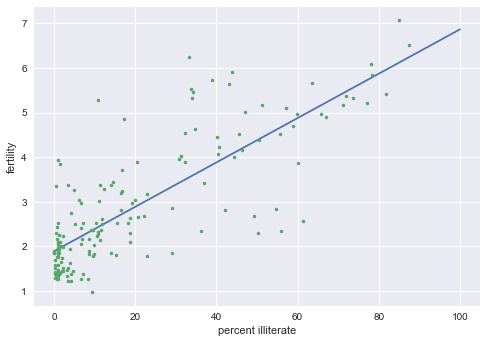

In [130]:
plt.plot(x,y)
plt.style.use('seaborn')
plt.margins(0.05)
plt.plot(illiteracy,fertility,marker='.',linestyle='none')
plt.xlabel('percent illiterate')
plt.ylabel('fertility')
plt.show()
plt.show()

Polyfit function finds the optimal slope and intercept that reduces the residual sum of squares 

#### find the optimal slope using a function  and plot it

In [134]:
# specify slopes to consider
slope_values = np.linspace(0, 0.1, 100)

In [137]:
# initialize an empty array to store the rss values
rss = np.empty_like(slope_values)

In [138]:
for i,a in enumerate(slope_values):
    rss[i] = np.sum((fertility-(b+illiteracy*a))**2)

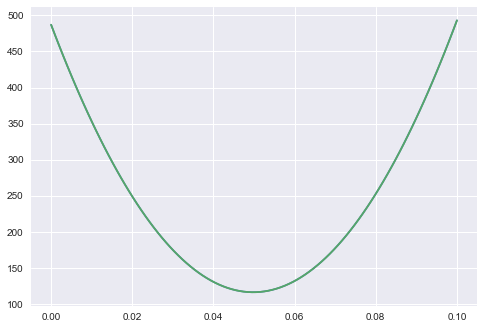

In [141]:
plt.plot(slope_values,rss)
plt.show()

based on the plot above, we can validate that the minimum residual sum of squares is at 0.049

#### Anscombe data and zip built-in function

In [233]:
filepath = 'https://assets.datacamp.com/production/course_1550/datasets/anscombe.csv'
anscombe_df = pd.read_csv(filepath,header=-1)

In [234]:
anscombe_df

,0,1,2,3,4,5,6,7
0,0,0,1,1,2,2,3,3
1,x,y,x,y,x,y,x,y
2,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
3,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
4,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
5,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
6,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
7,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
8,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
9,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50


In [235]:
x1 = pd.to_numeric(anscombe_df.loc[2:,0])
x2 = pd.to_numeric(anscombe_df.loc[2:,2])
x3 = pd.to_numeric(anscombe_df.loc[2:,4])
x4 = pd.to_numeric(anscombe_df.loc[2:,6])

anscombe_x = [x1, x2, x3, x4]

y1 = pd.to_numeric(anscombe_df.loc[2:,1])
y2 = pd.to_numeric(anscombe_df.loc[2:,3])
y3 = pd.to_numeric(anscombe_df.loc[2:,5])
y4 = pd.to_numeric(anscombe_df.loc[2:,7])

anscombe_y = [y1, y2, y3, y4]

In [236]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.500090909091 intercept: 3.00009090909
slope: 0.5 intercept: 3.00090909091
slope: 0.499727272727 intercept: 3.00245454545
slope: 0.499909090909 intercept: 3.00172727273


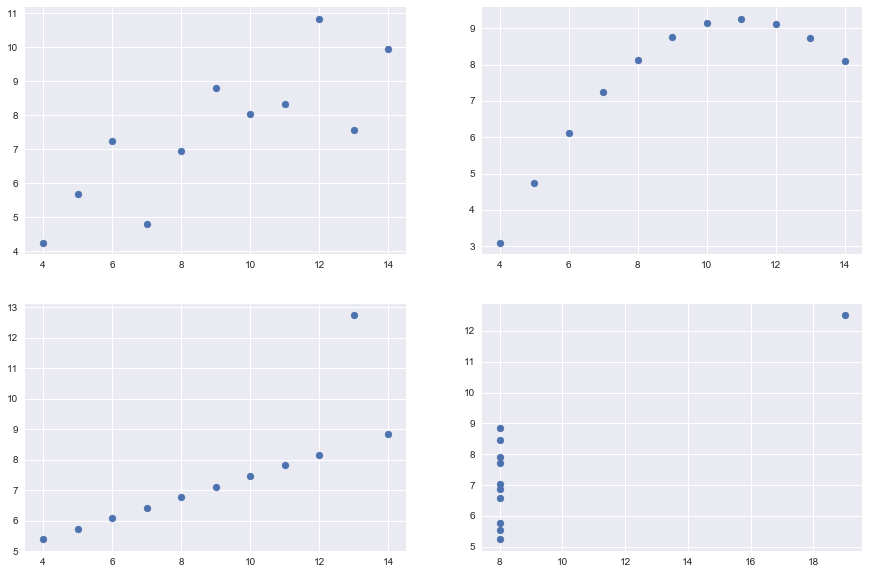

In [241]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,10))


ax1.scatter(x1, y1)
ax2.scatter(x2, y2)
ax3.scatter(x3, y3)
ax4.scatter(x4, y4)
plt.show()

Despite the apparent non-linear relationship in the graphs on the left, the slope and the intercept is the same for all graphs 